## Mental Health Data Prediction with Logistic Regression Model

## Data Understanding

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

### Interpretasi 1 :
#### 1.import pandas as pd
Di sini kami menggunakan pandas karena library ini menyediakan struktur data seperti DataFrame dan Series yang sangat efisien untuk memproses dan menganalisis data tabular (seperti file CSV, Excel, dll).

#### 2.import numpy as np
Di sini kami menggunakan numpy karena library ini menyediakan struktur array dan fungsi-fungsi matematis yang sangat cepat dan efisien untuk komputasi numerik.

#### 3.import matplotlib.pyplot as plt
Di sini kami menggunakan matplotlib.pyplot dikarenakan library ini merupakan standar utama untuk membuat grafik visualisasi dasar seperti scatter plot, bar chart, histogram, dll.

#### 4.import seaborn as sns
Di sini kami menggunakan seaborn karena library ini merupakan ekstensi dari matplotlib yang mempermudah pembuatan visualisasi statistik dengan tampilan yang lebih estetis dan informatif (misalnya heatmap, boxplot, violin plot).

#### 5.from sklearn.model_selection import train_test_split
Di sini kami menggunakan train_test_split karena metode ini sangat efisien untuk membagi dataset menjadi data latih dan data uji secara acak dengan rasio tertentu. Ini penting untuk mengevaluasi performa model secara objektif.

#### 6.from sklearn.linear_model import LogisticRegression
Di sini kami menggunakan LogisticRegression karena metode ini sangat cocok untuk klasifikasi biner, ringan secara komputasi, dan mudah diinterpretasikan karena berbasis probabilitas.

#### 7.from sklearn.metrics import classification_report, accuracy_score
Di sini kami menggunakan classification_report dan accuracy_score karena keduanya memberikan gambaran evaluasi performa model secara lengkap. accuracy_score menunjukkan persentase prediksi yang benar, sementara classification_report mencakup precision, recall, dan f1-score yang penting untuk klasifikasi terutama ketika data tidak seimbang.

#### 8.from sklearn.preprocessing import LabelEncoder
Di sini kami menggunakan LabelEncoder karena model machine learning hanya dapat bekerja dengan input numerik. LabelEncoder secara otomatis mengubah kategori string menjadi angka.

#### 9.from sklearn.impute import SimpleImputer
Di sini kami menggunakan SimpleImputer karena metode ini memungkinkan saya menangani nilai yang hilang secara efisien dengan menggantinya menggunakan strategi seperti mean, median, atau modus.

## Load Data

In [100]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sam_sub = pd.read_csv("/content/sample_submission.csv")

### Interpretasi 2

#### 1.train = pd.read_csv(r"C:\Dami\data\train.csv")
Di sini kami menggunakan metode pd.read_csv() untuk membaca file train.csv dan menyimpannya ke dalam variabel train dalam bentuk DataFrame. File ini biasanya berisi data latih (training data) yang digunakan untuk membangun dan melatih model machine learning.

#### 2.test = pd.read_csv(r"C:\Dami\data\test.csv")
Di sini kami menggunakan pd.read_csv() juga untuk membaca file test.csv dan menyimpannya dalam variabel test. File ini umumnya berisi data uji (testing data) yang tidak memiliki label target, dan digunakan untuk memprediksi hasil akhir menggunakan model yang sudah dilatih.

#### 3.sam_sub = pd.read_csv(r"C:\Dami\sample_submission.csv")
Di sini kami menggunakan file sample_submission.csv ke dalam variabel sam_sub. File ini biasanya disediakan sebagai contoh format output submission (khususnya dalam kompetisi seperti Kaggle). File ini menunjukkan struktur hasil prediksi yang diharapkan (misalnya kolom ID dan target prediksi).

## Describe Data

Tujuan: Memahami tipe data, distribusi, dan nilai unik.

In [101]:
train.head()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Interpretasi 3 :
Pemanggilan fungsi train.head() dari library pandas bertujuan untuk menampilkan lima baris pertama dari DataFrame train. Langkah ini merupakan bagian penting dari eksplorasi data awal (Exploratory Data Analysis/EDA), karena memungkinkan kita untuk melihat struktur umum dan isi dataset sebelum melakukan analisis lebih mendalam.

Dari hasil train.head(), terlihat bahwa dataset ini memuat berbagai informasi mengenai kondisi pribadi dan psikologis individu. Data mencakup identitas dasar seperti id, Name, Gender, Age, dan City. Selain itu, terdapat informasi mengenai status pekerjaan atau studi, termasuk kolom Working Professional or Student, Profession, Degree, dan CGPA. Aspek tekanan dan kesejahteraan juga direpresentasikan melalui kolom-kolom seperti Academic Pressure, Work Pressure, Financial Stress, Study Satisfaction, dan Job Satisfaction. Gaya hidup individu tergambar dari kolom Sleep Duration, Dietary Habits, dan Work/Study Hours. Terakhir, informasi psikologis seperti riwayat kesehatan mental keluarga (Family History of Mental Illness) serta pengalaman pikiran untuk bunuh diri (Have you ever had suicidal thoughts?) juga disertakan. Kolom Depression berfungsi sebagai label target untuk analisis, dengan nilai biner 0 atau 1, menunjukkan bahwa ini adalah kasus klasifikasi biner.

Dari inspeksi awal tersebut, kita dapat mengidentifikasi beberapa poin penting. Pertama, adanya kolom yang memiliki data hilang seperti CGPA, Academic Pressure, Study Satisfaction, dan Job Satisfaction, yang nantinya perlu ditangani sebelum pemodelan. Kedua, banyak kolom bersifat kategorikal, seperti Gender, City, Dietary Habits, dan Degree, sehingga perlu dilakukan encoding agar bisa digunakan dalam model pembelajaran mesin. Ketiga, karena kolom target Depression bersifat biner, maka pendekatan model yang digunakan harus sesuai dengan karakteristik klasifikasi dua kelas.

Secara keseluruhan, pemanggilan fungsi train.head() memberikan gambaran awal yang sangat penting mengenai dataset. Ini membantu dalam memahami jenis data yang tersedia, mendeteksi potensi masalah seperti nilai yang hilang atau format yang tidak konsisten, dan memandu langkah-langkah selanjutnya dalam proses analisis dan pemodelan.

In [102]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


### Interpretasi 4
- **id**: ID unik setiap responden.
- **Name**: Nama responden (identitas personal).
- **Gender**: Jenis kelamin responden.
- **Age**: Usia responden.
- **City**: Kota tempat tinggal responden.
- **Working Professional or Student**: Status utama responden (Profesional atau Mahasiswa).
- **Profession**: Pekerjaan spesifik; kosong untuk mahasiswa.
- **Academic Pressure**: Tekanan akademik; hanya diisi untuk mahasiswa.
- **Work Pressure**: Tekanan kerja; hanya diisi untuk profesional.
- **CGPA**: Nilai IPK, hanya tersedia untuk mahasiswa.
- **Study Satisfaction**: Kepuasan belajar, hanya tersedia untuk mahasiswa.
- **Job Satisfaction**: Kepuasan kerja, hanya tersedia untuk profesional.
- **Sleep Duration**: Durasi tidur; kategorikal (contoh: Less than 5 hours, 7–8 hours, dll).
- **Dietary Habits**: Pola makan (contoh: Moderate).
- **Degree**: Gelar akademik terakhir yang diperoleh responden
- **Have you ever had suicidal thoughts?**:Respons terhadap pertanyaan apakah responden pernah memiliki pikiran untuk bunuh diri (Yes/No). Ini penting sebagai indikator risiko depresi.
- **Work/Study Hours**:Jumlah jam kerja atau belajar per hari. Angka ini bisa menjadi indikator tekanan aktivitas harian.
- **Financial Stress**:Tingkat stres finansial (numerik), bisa dikonversi dari kategorikal jika diperlukan.
- **Family History of Mental Illness**:Apakah responden memiliki riwayat keluarga dengan gangguan mental. Merupakan faktor penting dalam risiko depresi.


In [103]:
sam_sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


### Interpretasi 5
Di sini kami menggunakan `sam_sub.head()` karena kami ingin melihat lima baris pertama dari DataFrame `sam_sub`. Fungsi ini digunakan sebagai langkah awal dalam eksplorasi data untuk memastikan bahwa DataFrame telah berhasil dibuat dan memuat data yang sesuai dengan struktur yang diharapkan. Dengan menampilkan sampel data, kami dapat memverifikasi bahwa setiap kolom memiliki nama dan isi yang benar serta memahami tipe data yang digunakan. Berdasarkan output yang ditampilkan, `sam_sub` memiliki dua kolom, yaitu `id` dan `Depression`. Kolom `id` merepresentasikan identitas unik dari setiap entri, sementara kolom `Depression` menunjukkan label hasil klasifikasi, dengan nilai `0` menandakan bahwa individu tidak mengalami depresi. Kelima baris yang ditampilkan menunjukkan bahwa seluruh entri memiliki nilai `0` pada kolom `Depression`, yang mengindikasikan bahwa semua prediksi untuk data tersebut adalah non-depresi. Dari struktur dan isi datanya, kami menyimpulkan bahwa `sam_sub` kemungkinan merupakan data hasil prediksi yang akan digunakan sebagai submission dalam proses evaluasi model.

In [104]:
print(train.shape)
print(test.shape)

(140700, 20)
(93800, 19)


### Interpretasi 6
Disini kami menggunakan perintah `print(train.shape)` dan `print(test.shape)` untuk menampilkan dimensi dari dataset pelatihan (`train`) dan pengujian (`test`). Hasil yang ditampilkan adalah:

- `train.shape`: (140700, 20)
- `test.shape`: (93800, 19)

Artinya, dataset `train` memiliki 140.700 baris dan 20 kolom, sedangkan dataset `test` memiliki 93.800 baris dan 19 kolom. Baris merepresentasikan jumlah sampel data, dan kolom merepresentasikan jumlah fitur atau atribut dalam dataset tersebut.

Perbedaan jumlah kolom antara `train` dan `test` mengindikasikan bahwa ada satu kolom yang tidak disertakan dalam data pengujian. Umumnya, kolom yang hilang tersebut adalah kolom target atau label yang ingin diprediksi oleh model. Hal ini merupakan praktik umum dalam pemodelan machine learning, di mana model dilatih menggunakan fitur dan target dari data pelatihan, dan kemudian diuji menggunakan hanya fitur dari data pengujian untuk mengevaluasi performa prediksi model tanpa informasi label yang bocor.


## Validation Data
EDA (exploratory data analysis)

Tujuan EDA adalah untuk menemukan pola, anomali, dan hubungan antar variabel dalam data.

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

### Interpretasi 8
## Interpretasi DataFrame `train`
Dataset ini berisi **140.700 entri** dan **20 kolom**, dengan kombinasi tipe data `int64`, `float64`, dan `object`. Dataset ini tampaknya digunakan untuk menganalisis faktor-faktor yang berkaitan dengan depresi, ditunjukkan oleh kolom target **`Depression`**. Berikut adalah penjelasan untuk masing-masing kolom
## Interpretasi Per Kolom:

1. **id**  
   Berisi angka unik (`int64`) yang digunakan sebagai identifikasi tiap baris data. Tidak ada nilai kosong.

2. **Name**  
   Nama individu (`object`). Kolom ini jarang digunakan dalam analisis karena bersifat identifikasi personal. Tidak ada nilai kosong.

3. **Gender**  
   Menunjukkan jenis kelamin responden. Tidak ada nilai kosong. Bisa digunakan untuk melihat perbedaan depresi berdasarkan gender.

4. **Age**  
   Usia individu dalam bentuk angka desimal (`float64`). Tidak ada nilai kosong. Berguna untuk analisis umur terhadap depresi.

5. **City**  
   Nama kota tempat tinggal responden. Tidak ada nilai kosong. Bisa dipakai untuk analisis geografis.

6. **Working Professional or Student**  
   Kategori pekerjaan utama responden: apakah mereka seorang profesional atau pelajar. Tidak ada nilai kosong.

7. **Profession**  
   Jenis profesi spesifik. Memiliki 104.070 data tidak kosong, berarti sekitar 36.630 baris hilang, mungkin karena responden adalah pelajar.

8. **Academic Pressure**  
   Tingkat tekanan akademik dalam skala numerik (`float64`). Hanya tersedia untuk 27.897 baris, kemungkinan hanya untuk pelajar.

9. **Work Pressure**  
   Tingkat tekanan kerja (`float64`), tersedia untuk 112.782 baris. Mungkin hanya relevan bagi pekerja.

10. **CGPA**  
    IPK responden (`float64`), hanya tersedia untuk 27.898 entri, kemungkinan hanya untuk pelajar.

11. **Study Satisfaction**  
    Kepuasan terhadap studi (`float64`), hanya tersedia untuk pelajar juga (27.897 data non-null).

12. **Job Satisfaction**  
    Kepuasan terhadap pekerjaan (`float64`), tersedia untuk 112.790 baris, relevan untuk profesional.

13. **Sleep Duration**  
    Durasi tidur responden, kemungkinan dalam jam (`object`, kemungkinan perlu diubah ke numerik). Tidak ada nilai kosong.

14. **Dietary Habits**  
    Pola makan responden (`object`). Terdapat 140.696 data, artinya ada 4 data yang hilang.

15. **Degree**  
    Tingkat pendidikan terakhir. Hanya 2 nilai yang hilang dari total 140.700 entri.

16. **Have you ever had suicidal thoughts ?**  
    Respon terhadap pertanyaan tentang pikiran bunuh diri. Tidak ada nilai kosong, penting untuk dikaitkan dengan kolom `Depression`.

17. **Work/Study Hours**  
    Jumlah jam kerja atau belajar per hari (`float64`). Tidak ada nilai kosong.

18. **Financial Stress**  
    Tingkat stres finansial (`object`), hanya 4 data hilang. Bisa dikonversi ke skala numerik jika diperlukan.

19. **Family History of Mental Illness**  
    Riwayat penyakit mental dalam keluarga (`object`). Tidak ada nilai kosong. Faktor penting dalam prediksi depresi.

20. **Depression**  
    Kolom target dalam bentuk angka (`int64`), kemungkinan nilai 0 = tidak depresi, 1 = depresi. Tidak ada nilai kosong.


In [106]:
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Check Missing Values


### Interpretasi 9
Disini kami menggunakan `train.columns` untuk menampilkan seluruh nama kolom (fitur) yang terdapat dalam dataset pelatihan (`train`). Ini merupakan langkah penting dalam tahap eksplorasi data awal, karena membantu memahami struktur data yang tersedia serta jenis informasi yang dikandung setiap kolom. Output dari perintah ini adalah daftar kolom seperti 'id', 'Name', 'Gender', 'Age', 'City', dan lain-lain hingga label target yaitu 'Depression'.

Dari hasil yang ditampilkan pada gambar, kita dapat melihat bahwa dataset ini terdiri dari berbagai jenis fitur, baik numerik maupun kategorikal, yang berkaitan dengan karakteristik demografis (seperti usia dan jenis kelamin), kondisi akademik atau pekerjaan (seperti CGPA, jam kerja/belajar), hingga faktor psikologis (seperti tekanan akademik, tekanan kerja, dan riwayat kesehatan mental keluarga). Informasi ini sangat berguna untuk menentukan langkah selanjutnya seperti proses pembersihan data, pemilihan fitur, dan transformasi data sebelum dilakukan modeling.


In [107]:
train.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


### Interpretasi 10

Fungsi `train.isnull().sum()` digunakan untuk memeriksa jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset `train`. Langkah ini penting dilakukan sebelum proses analisis dan pemodelan, karena data yang hilang dapat mempengaruhi akurasi model dan hasil analisis secara keseluruhan. Dengan menjumlahkan nilai `null` untuk setiap kolom, kita bisa mengetahui kolom mana saja yang perlu dipertimbangkan untuk pembersihan atau imputasi data.

Dari hasil output yang ditampilkan, terlihat bahwa beberapa kolom memiliki jumlah nilai kosong yang cukup signifikan. Kolom seperti `Academic Pressure`, `CGPA`, dan `Study Satisfaction` masing-masing memiliki lebih dari 112.000 nilai kosong, sementara `Profession`, `Work Pressure`, dan `Job Satisfaction` juga memiliki puluhan ribu data yang hilang. Di sisi lain, ada juga kolom dengan jumlah missing value yang sangat sedikit, seperti `Dietary Habits`, `Degree`, dan `Financial Stress`, yang hanya memiliki 2–4 nilai kosong. Informasi ini sangat berguna untuk menentukan strategi penanganan data kosong, seperti menghapus kolom tertentu, mengisi dengan nilai rata-rata/modus, atau menggunakan teknik imputasi lainnya.


In [108]:
test.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,24632
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


 Cek Duplicate

### Interpretasi 12
Kami menggunakan fungsi `test.isnull().sum()` untuk mengidentifikasi jumlah nilai kosong (missing values) pada masing-masing kolom dalam dataset `test`. Langkah ini sangat penting untuk memastikan bahwa data uji (test data) memiliki kualitas yang baik sebelum digunakan dalam proses prediksi atau evaluasi model. Nilai kosong dapat menyebabkan error saat training atau testing model, serta berpengaruh negatif terhadap performa model.

Dari hasil output yang ditampilkan, dapat dilihat bahwa terdapat beberapa kolom dengan jumlah nilai kosong yang cukup signifikan. Misalnya, kolom `Academic Pressure`, `CGPA`, dan `Study Satisfaction` masing-masing memiliki sekitar 75.000 nilai kosong, sedangkan `Profession`, `Work Pressure`, dan `Job Satisfaction` juga memiliki puluhan ribu nilai kosong. Di sisi lain, beberapa kolom seperti `Dietary Habits` dan `Degree` hanya memiliki sedikit data yang hilang, yaitu kurang dari 10. Sementara itu, sebagian besar kolom lainnya tidak memiliki nilai kosong sama sekali. Informasi ini penting untuk menentukan metode penanganan yang sesuai, seperti menghapus baris/kolom, mengisi dengan nilai rata-rata, modus, atau menggunakan teknik imputasi lainnya sebelum melanjutkan ke tahap pemodelan.


In [109]:
all_duplicates = train[train.duplicated(keep=False)]
print(all_duplicates)

Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


### Interpretasi 13
Kami menggunakan fungsi `train[train.duplicated(keep=False)]` untuk mendeteksi baris-baris duplikat dalam dataset `train`, dengan parameter `keep=False` yang berarti semua baris yang terindikasi sebagai duplikat akan ditampilkan (baik baris pertama maupun yang duplikatnya). Pemeriksaan data duplikat ini penting dilakukan dalam tahap pra-pemrosesan data, karena keberadaan data yang sama persis lebih dari satu kali dapat menyebabkan bias dalam pelatihan model dan menghasilkan hasil yang tidak akurat.

Dari hasil output yang ditampilkan, dapat disimpulkan bahwa tidak ditemukan adanya data duplikat dalam dataset `train`, karena DataFrame yang dikembalikan kosong. Ini menunjukkan bahwa setiap entri dalam data tersebut unik dan tidak perlu dilakukan tindakan penghapusan data duplikat. Ini merupakan kondisi yang ideal sebelum melanjutkan ke tahap analisis atau pelatihan model.


In [110]:
# Count duplicates
duplicate_count = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Interpretasi 14
Disini kami menggunakan fungsi `train.duplicated().sum()` untuk menghitung jumlah baris duplikat dalam DataFrame bernama `train`. Fungsi `duplicated()` akan mengembalikan sebuah Series boolean yang menandai baris-baris yang merupakan duplikat (yaitu baris yang memiliki nilai yang sama persis dengan baris sebelumnya di seluruh kolom). Kemudian, fungsi `sum()` digunakan untuk menghitung jumlah `True` dalam Series tersebut, yang merepresentasikan total baris duplikat.

Hasil dari kode tersebut adalah `Number of duplicate rows: 0`, yang berarti tidak ditemukan satupun baris yang terduplikasi di dalam dataset `train`. Hal ini penting untuk diketahui dalam proses pembersihan data (data cleaning), karena adanya duplikasi dapat menyebabkan bias atau distorsi dalam analisis atau pemodelan data.

In [111]:
# Count duplicates
duplicate_count = test.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Distribusi Target

### Interpretasi 15
Disini dilakukan pemeriksaan terhadap data duplikat dalam DataFrame `test` menggunakan fungsi `duplicated()`. Fungsi ini mengembalikan nilai boolean (`True` untuk baris yang dianggap duplikat, dan `False` untuk yang unik). Kemudian, fungsi `sum()` digunakan untuk menghitung total jumlah `True`, yaitu jumlah baris yang terduplikasi.

Tujuan dari proses ini adalah untuk memastikan bahwa data yang digunakan dalam tahap analisis atau pemodelan tidak memiliki baris yang sama persis lebih dari satu kali, karena duplikasi data dapat mempengaruhi hasil analisis dan kinerja model machine learning.

Hasil dari kode tersebut menunjukkan bahwa **"Number of duplicate rows: 0"**, yang berarti tidak ada baris duplikat dalam DataFrame `test`. Hal ini menunjukkan bahwa data sudah bersih dari duplikasi dan siap untuk dianalisis lebih lanjut, seperti yang ditunjukkan oleh bagian selanjutnya dengan judul "Distribusi Target".


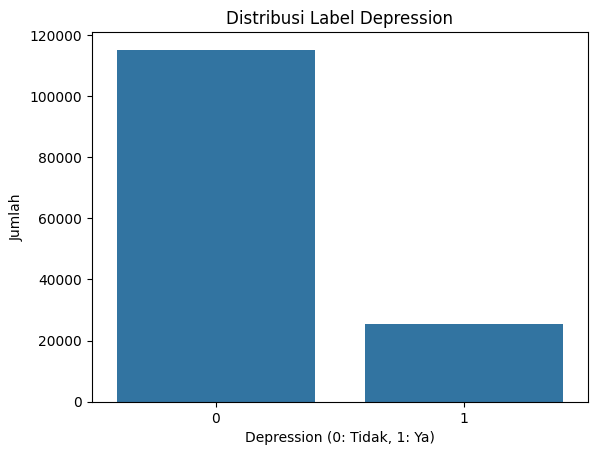

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Depression', data=train)
plt.title('Distribusi Label Depression')
plt.xlabel('Depression (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()

Analisis Fitur Numerik

### Interpretasi 16

Visualisasi ini menggunakan fungsi `sns.countplot()` dari library Seaborn untuk menampilkan distribusi label target `Depression` dalam dataset pelatihan. Parameter `x='Depression'` menunjukkan bahwa sumbu x berisi kategori label, yaitu 0 (tidak mengalami depresi) dan 1 (mengalami depresi), sedangkan parameter `data=train` menyatakan bahwa data yang digunakan berasal dari dataset pelatihan.

Hasil visualisasi menunjukkan bahwa mayoritas data berlabel 0, artinya sebagian besar individu dalam dataset tidak mengalami depresi. Sebaliknya, hanya sebagian kecil data yang berlabel 1. Ketidakseimbangan distribusi ini penting untuk diperhatikan karena dapat memengaruhi performa model machine learning, terutama dalam klasifikasi. Model yang dilatih pada data yang tidak seimbang cenderung bias terhadap kelas mayoritas. Oleh karena itu, analisis ini membantu dalam mengidentifikasi kebutuhan untuk menangani class imbalance, misalnya dengan teknik oversampling, undersampling, atau penggunaan metrik evaluasi yang lebih sesuai seperti F1-score.


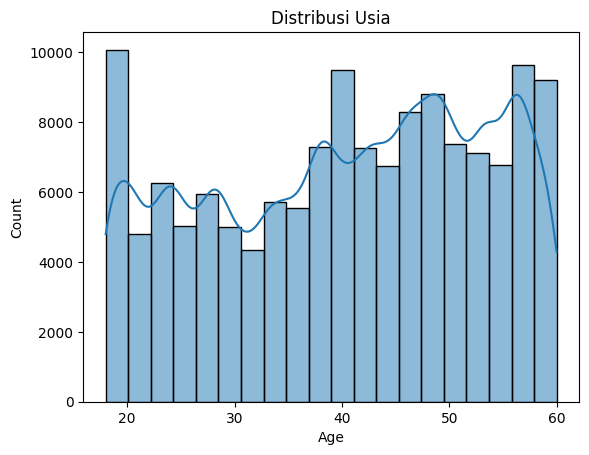

In [113]:
# Distribusi umur
sns.histplot(train['Age'], bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Age')
plt.show()


Analisis Fitur Kategorikal terhadap Target

### Interpretasi 17

Pada bagian ini,kami menggunakan fungsi `sns.histplot()` dari library Seaborn untuk memvisualisasikan distribusi data umur (`Age`) dalam dataset pelatihan (`train`). Parameter `bins=20` digunakan untuk membagi rentang usia menjadi 20 kelompok interval, sementara `kde=True` menambahkan kurva estimasi distribusi probabilitas (Kernel Density Estimation) di atas histogram. Tujuan dari visualisasi ini adalah untuk memahami pola sebaran usia dari data yang tersedia.

Hasil visualisasi menunjukkan bahwa data usia tersebar cukup merata pada rentang usia 18 hingga 60 tahun, dengan puncak jumlah data berada di usia sekitar 18-20 dan 55-60 tahun. Kurva KDE memberikan gambaran halus tentang tren distribusi, memperlihatkan bahwa terdapat peningkatan jumlah data pada usia menengah hingga lanjut. Informasi ini penting dalam proses eksplorasi data karena bisa menjadi indikasi bahwa usia mungkin berpengaruh terhadap target yang ingin diprediksi, terutama jika fitur ini akan digunakan dalam model machine learning.


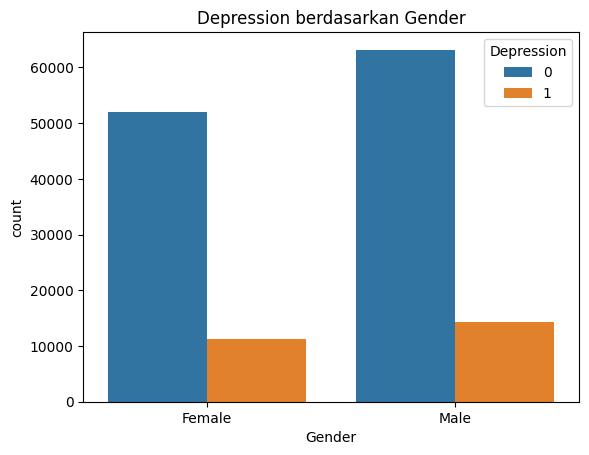

In [114]:
# Distribusi Gender vs Depression
sns.countplot(x='Gender', hue='Depression', data=train)
plt.title('Depression berdasarkan Gender')
plt.show()


### Interpretasi 18

Dalam visualisasi ini kami menggunakan fungsi `sns.countplot()` untuk menampilkan distribusi label `Depression` berdasarkan jenis kelamin (`Gender`) dalam dataset pelatihan. Parameter `x='Gender'` menunjukkan bahwa sumbu x berisi kategori jenis kelamin, sedangkan `hue='Depression'` digunakan untuk memisahkan data berdasarkan label depresi (0: Tidak, 1: Ya). Dengan visualisasi ini, kita dapat membandingkan jumlah individu dengan dan tanpa depresi di masing-masing kategori gender.

Hasil visualisasi memperlihatkan bahwa baik laki-laki maupun perempuan memiliki jumlah individu yang tidak mengalami depresi (label 0) jauh lebih tinggi dibandingkan yang mengalami depresi (label 1). Namun, secara proporsional, terlihat bahwa perempuan memiliki jumlah kasus depresi sedikit lebih tinggi dibandingkan laki-laki. Informasi ini dapat memberikan wawasan awal dalam analisis hubungan antara gender dan kondisi depresi, yang mungkin relevan dalam pembuatan model prediktif maupun dalam interpretasi hasil model.


Heatmap Korelasi (Numerik)

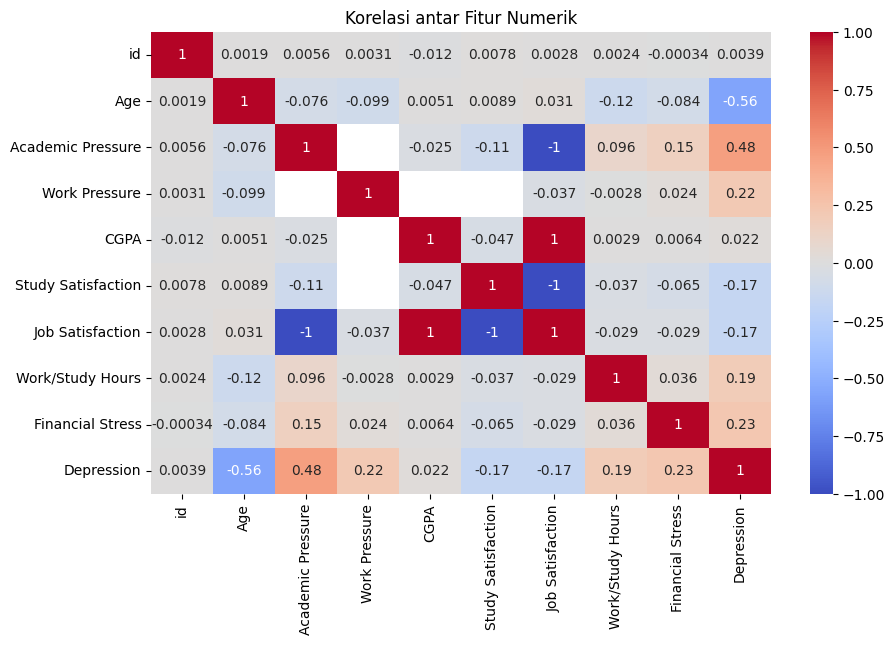

In [115]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()


### Interpretasi 19
Visualisasi heatmap pada fungsi ini digunakan untuk menunjukkan hubungan korelasi antar fitur numerik dalam dataset `train`. Korelasi dihitung menggunakan metode Pearson melalui fungsi `train.corr(numeric_only=True)`, yang menghasilkan matriks korelasi antar semua fitur numerik. Heatmap kemudian divisualisasikan dengan bantuan `seaborn.heatmap()`, di mana parameter `annot=True` digunakan untuk menampilkan nilai korelasi dalam masing-masing sel, dan `cmap='coolwarm'` memberikan gradasi warna dari biru (negatif) ke merah (positif).

Dari hasil heatmap yang ditampilkan, dapat dilihat beberapa insight penting, misalnya:
- Fitur **Depression** memiliki korelasi negatif cukup kuat dengan **Age** (-0.56), yang menunjukkan bahwa semakin muda usia responden, kecenderungan mengalami depresi lebih tinggi.
- Korelasi positif paling tinggi terhadap **Depression** berasal dari **Academic Pressure** (0.48), diikuti oleh **Work Pressure** (0.22) dan **Financial Stress** (0.23). Hal ini mengindikasikan bahwa tekanan akademik, pekerjaan, dan keuangan memiliki kontribusi terhadap tingkat depresi.
- Terdapat korelasi negatif antara **Job Satisfaction** dan beberapa variabel seperti **Academic Pressure** dan **Depression**, yang menyiratkan bahwa tingkat kepuasan kerja yang rendah dapat berkaitan dengan tekanan dan kondisi psikologis yang buruk.

Secara umum, heatmap ini membantu dalam mengidentifikasi fitur-fitur mana yang saling berkorelasi tinggi dan bisa dipertimbangkan dalam pemilihan fitur atau analisis lanjutan.


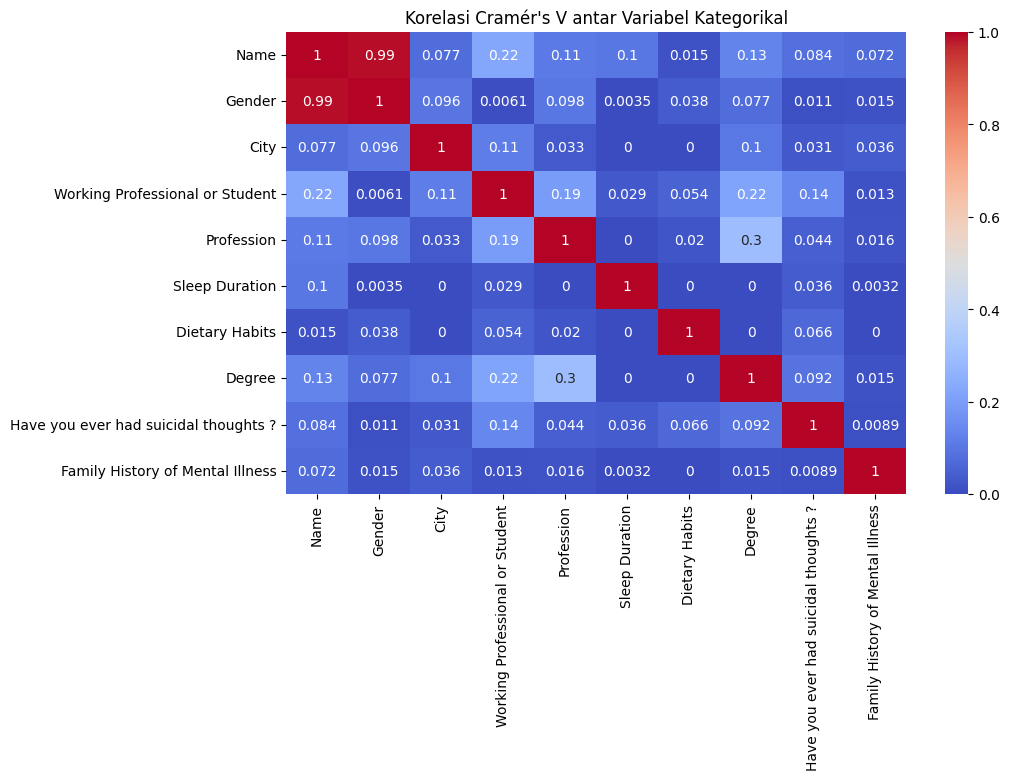

In [116]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Ambil kolom kategorikal
cat_cols = train.select_dtypes(include=['object', 'category']).columns
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Hitung korelasi Cramér's V untuk semua pasangan
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(train[col1], train[col2])

# Konversi ke float
cramers_matrix = cramers_matrix.astype(float)

# Tampilkan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Korelasi Cramér's V antar Variabel Kategorikal")
plt.show()


In [117]:
def nullpercent(df):
    value=(df.isnull().sum()/df.shape[0])*100
    print(value)

In [118]:
nullpercent(train)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

### Interpretasi 21
Fungsi `nullpercent(df)` digunakan untuk menghitung dan menampilkan persentase nilai yang hilang (missing values) pada setiap kolom dalam DataFrame. Fungsi ini bekerja dengan menjumlahkan nilai `NaN` di setiap kolom menggunakan `df.isnull().sum()`, kemudian membaginya dengan jumlah total baris (`df.shape[0]`), dan dikalikan 100 untuk mendapatkan persentasenya. Hasilnya kemudian ditampilkan dengan `print()`.

Dari hasil yang ditampilkan pada gambar, kita dapat melihat bahwa beberapa kolom memiliki persentase missing value yang cukup tinggi, seperti:
- `CGPA`, `Study Satisfaction`, dan `Job Satisfaction` yang memiliki nilai hilang di atas 80% dan 19%.
- Kolom `Profession` juga memiliki persentase missing sebesar 26.03%.
- Sementara sebagian besar kolom lainnya seperti `Name`, `Gender`, `City`, `Sleep Duration`, dan `Depression` memiliki nilai 0%, yang berarti tidak ada data yang hilang pada kolom-kolom tersebut.

Informasi ini sangat penting dalam tahap preprocessing data. Kolom dengan banyak missing value seperti `CGPA` dan `Study Satisfaction` perlu dianalisis lebih lanjut, apakah perlu dihapus, diisi dengan imputasi, atau ditangani dengan cara khusus tergantung pada konteks dan pentingnya fitur tersebut dalam analisis atau pemodelan.


In [119]:
# Include NaN values, zeros, and negatives in value counts
train['Academic Pressure'].value_counts(dropna=False)

,count
Academic Pressure,
NaN,112803
3.0,7463
5.0,6296
4.0,5158
1.0,4801
2.0,4179


### Interpretasi 22
Fungsi `train['Academic Pressure'].value_counts(dropna=False)` digunakan untuk menghitung frekuensi kemunculan setiap nilai unik dalam kolom `Academic Pressure`, termasuk nilai `NaN` (hilang), dengan `dropna=False`. Hal ini penting untuk memahami distribusi nilai serta seberapa banyak data yang hilang dalam fitur tersebut sebelum melakukan imputasi atau pembersihan data.

Hasil dari perintah tersebut menunjukkan bahwa terdapat **112.803** entri yang bernilai `NaN`, yang berarti bagian besar dari kolom ini memiliki nilai yang hilang. Selain itu, nilai-nilai lainnya berkisar antara 1 hingga 5, yang kemungkinan merepresentasikan tingkat tekanan akademik dalam bentuk skala ordinal (misalnya dari rendah ke tinggi). Nilai yang paling sering muncul setelah `NaN` adalah:
- Nilai 3 sebanyak 7.463 kali
- Nilai 5 sebanyak 6.296 kali
- Nilai 4 sebanyak 5.158 kali

Distribusi ini menunjukkan bahwa sebagian besar responden mengalami tekanan akademik pada level menengah hingga tinggi. Namun, karena data yang hilang sangat dominan, langkah selanjutnya perlu mempertimbangkan metode imputasi yang sesuai atau kemungkinan penghapusan kolom jika tidak signifikan terhadap analisis lebih lanjut.


In [120]:
train['CGPA'].value_counts(dropna=False)

,count
CGPA,
NaN,112802
8.0400,822
9.9600,425
5.7400,410
8.9500,371
...,...
6.6400,1
7.0625,1
6.9800,1


### Interpretasi 23

Kode `train['CGPA'].value_counts(dropna=False)` digunakan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom `CGPA`, termasuk nilai `NaN` (hilang), dengan `dropna=False`. Tujuan dari langkah ini adalah untuk memahami sebaran nilai CGPA (Cumulative Grade Point Average) sekaligus mengetahui seberapa besar jumlah data yang hilang pada kolom ini.

Hasil yang ditampilkan menunjukkan bahwa terdapat **112.802** entri dengan nilai `NaN`, yang berarti proporsi data hilang pada kolom ini sangat besar. Selain itu, terdapat **332 nilai unik** dalam data CGPA yang tersedia, menandakan bahwa nilai ini bersifat kontinu (bukan kategori), dan banyak nilai berbeda hanya muncul satu kali. Nilai CGPA yang paling sering muncul adalah 8.0400 (sebanyak 822 kali), diikuti oleh 9.9600 (425 kali), dan 5.7400 (410 kali).

Distribusi ini menunjukkan bahwa meskipun terdapat pola umum dalam sebaran CGPA, variasi nilainya cukup luas. Namun, dengan proporsi missing value yang sangat besar, penting untuk mengevaluasi apakah kolom ini dapat diimputasi secara bermakna, atau justru harus dihapus apabila data tidak dapat diandalkan atau tidak relevan terhadap target analisis.

In [121]:
train['Study Satisfaction'].value_counts(dropna=False)

,count
Study Satisfaction,
NaN,112803
4.0,6360
2.0,5840
3.0,5823
1.0,5451
5.0,4423


### Interpretasi 24

Kode `train['Study Satisfaction'].value_counts(dropna=False)` digunakan untuk menghitung frekuensi kemunculan setiap nilai unik dalam kolom `Study Satisfaction`, termasuk nilai yang hilang (`NaN`) dengan mengatur `dropna=False`. Tujuan dari analisis ini adalah untuk memahami sebaran tingkat kepuasan studi para responden sekaligus mengidentifikasi proporsi data yang hilang.

Berdasarkan hasil yang ditampilkan, terdapat **112.803** nilai `NaN`, menunjukkan bahwa sebagian besar data pada kolom ini hilang. Di sisi lain, nilai-nilai lainnya terdiri dari skala 1 hingga 5 yang tampaknya merepresentasikan tingkat kepuasan studi dari sangat tidak puas (1) hingga sangat puas (5). Nilai yang paling sering muncul adalah:
- Nilai 4.0 sebanyak 6.360 kali
- Nilai 2.0 sebanyak 5.840 kali
- Nilai 3.0 sebanyak 5.823 kali

Distribusi ini cukup merata di tengah-tengah skala, mengindikasikan bahwa sebagian besar responden memiliki tingkat kepuasan yang sedang hingga tinggi. Namun, karena jumlah nilai `NaN` sangat besar, hal ini menunjukkan adanya potensi masalah kualitas data dan perlu dipertimbangkan pendekatan khusus untuk imputasi atau evaluasi ulang apakah fitur ini layak untuk dimasukkan dalam model prediktif.


In [122]:
train['Job Satisfaction'].value_counts(dropna=False)

,count
Job Satisfaction,
NaN,27910
2.0,24783
5.0,22812
1.0,22324
3.0,21951
4.0,20920


### Interpretasi 25
Fungsi `train['Job Satisfaction'].value_counts(dropna=False)` digunakan untuk menghitung jumlah masing-masing nilai unik dalam kolom `Job Satisfaction`, termasuk nilai yang hilang (`NaN`) dengan `dropna=False`. Analisis ini dilakukan untuk memahami bagaimana distribusi kepuasan kerja dalam dataset, serta seberapa besar proporsi data yang tidak tersedia.

Hasilnya menunjukkan bahwa terdapat **27.910** nilai `NaN`, yang cukup signifikan meskipun tidak sebesar fitur lain seperti 'CGPA' atau 'Study Satisfaction'. Data yang tersedia tersebar pada skala 1 hingga 5, yang kemungkinan merepresentasikan tingkat kepuasan kerja dari sangat tidak puas (1) hingga sangat puas (5). Nilai yang paling banyak muncul adalah:
- Nilai 2.0 sebanyak 24.783 kali
- Nilai 5.0 sebanyak 22.812 kali
- Nilai 1.0 sebanyak 22.324 kali

Distribusi ini menunjukkan adanya variasi yang cukup seimbang, namun dengan sedikit kecenderungan terhadap ketidakpuasan (nilai rendah) dan kepuasan tinggi (nilai 5), yang bisa menunjukkan dua kutub persepsi dalam data responden. Keberadaan nilai `NaN` yang besar tetap harus diperhatikan, dan mungkin perlu strategi imputasi atau evaluasi apakah data ini cukup penting dan representatif untuk dimasukkan dalam analisis lanjutan atau model prediktif.


In [123]:
train['Profession'].value_counts(dropna=False)

,count
Profession,
NaN,36630
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4229
...,...
Moderate,1
Analyst,1
Pranav,1


### Interpretasi 26
Fungsi `train['Profession'].value_counts(dropna=False)` digunakan untuk menghitung jumlah masing-masing kategori unik dalam kolom `Profession`, termasuk nilai yang hilang (`NaN`). Tujuan analisis ini adalah untuk mengevaluasi keragaman profesi yang tercatat dalam dataset serta sejauh mana data ini tersedia atau hilang.

Berdasarkan hasil yang ditampilkan, terdapat **36.630** nilai `NaN` pada kolom ini, menunjukkan bahwa sebagian besar data pada fitur `Profession` tidak tersedia. Untuk nilai yang tersedia, profesi paling umum adalah:
- **Teacher** sebanyak 24.906 data,
- **Content Writer** sebanyak 7.814 data,
- **Architect** sebanyak 4.370 data,
- **Consultant** sebanyak 4.229 data.

Selain itu, terdapat total **65 kategori profesi yang berbeda**, termasuk profesi yang hanya muncul satu kali seperti `Dev`, `Family Consultant`, dan bahkan nama yang tampaknya merupakan kesalahan entri data seperti `Yuvraj`. Hal ini menunjukkan bahwa fitur ini sangat bervariasi dan mengandung kemungkinan *outlier* atau nilai yang tidak konsisten.

Keberagaman kategori ini perlu dipertimbangkan secara khusus sebelum digunakan dalam pemodelan, terutama jika akan dilakukan encoding. Kategori dengan jumlah sangat sedikit dapat dipertimbangkan untuk digabungkan dalam kelompok "lain-lain", dan nilai `NaN` harus ditangani dengan strategi imputasi atau klasifikasi ulang yang tepat.


In [124]:
train['Working Professional or Student'].value_counts(dropna=False)

,count
Working Professional or Student,
Working Professional,112799
Student,27901


### Interpretasi 27
Disini kami menggunakan `train['Working Professional or Student'].value_counts(dropna=False)` untuk menghitung jumlah masing-masing kategori dalam kolom **'Working Professional or Student'**, termasuk nilai yang hilang jika ada. Analisis ini bertujuan untuk memahami proporsi antara peserta yang merupakan profesional aktif dengan yang masih berstatus pelajar.

Berdasarkan hasil yang ditampilkan, data terbagi menjadi dua kelompok utama:
- **Working Professional** sebanyak **112.799** data,
- **Student** sebanyak **27.901** data.

Dari distribusi ini, terlihat bahwa mayoritas responden merupakan profesional yang sudah bekerja, yakni sekitar **80%** dari total data. Hal ini dapat mempengaruhi interpretasi hasil analisis atau model prediksi, karena pengalaman, tekanan, dan kondisi mereka kemungkinan besar berbeda dengan mahasiswa.

Distribusi kategori yang seimbang atau tidak terlalu timpang sangat penting dalam pemodelan klasifikasi untuk menghindari bias terhadap mayoritas kelas. Oleh karena itu, penting untuk mempertimbangkan proporsi ini dalam proses preprocessing maupun saat membagi data untuk pelatihan dan pengujian model.


In [125]:
train['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,38784
7-8 hours,36969
More than 8 hours,32726
5-6 hours,32142
3-4 hours,12
6-7 hours,8
4-5 hours,7
4-6 hours,5
2-3 hours,5


### Interpretasi 28
Fungsi `train['Sleep Duration'].value_counts()` digunakan untuk menghitung jumlah kemunculan masing-masing nilai dalam kolom **'Sleep Duration'**. Tujuan dari analisis ini adalah untuk memahami distribusi durasi tidur responden serta mengidentifikasi kemungkinan adanya entri data yang tidak konsisten atau tidak relevan.

Hasil dari perintah tersebut menunjukkan bahwa mayoritas responden mencatatkan durasi tidur yang tergolong dalam tiga kelompok utama:
- **Less than 5 hours** sebanyak **38.784** data,
- **7–8 hours** sebanyak **36.969** data,
- **More than 8 hours** sebanyak **32.726** data.

Terdapat juga kategori lain seperti **5–6 hours** (32.142 data), yang masih cukup umum, namun setelah itu mulai muncul berbagai nilai yang tidak konsisten, seperti **3–4 hours**, **10–11 hours**, bahkan nilai tidak bermakna seperti **Sleep_Duration**, **Unhealthy**, **Pune**, **Work_Study_Hours**, dan **Moderate**. Nilai-nilai ini kemungkinan besar merupakan hasil kesalahan input atau kolom lain yang tercampur ke dalam kolom ini.

Dengan melihat hasil ini, kita dapat menyimpulkan bahwa data pada kolom `Sleep Duration` perlu dilakukan pembersihan (data cleaning), seperti menyatukan kategori yang sejenis, menghapus nilai yang tidak relevan, serta mungkin mengubah semua entri menjadi format standar (misalnya, durasi dalam satuan jam berbentuk angka). Langkah ini penting agar fitur ini dapat digunakan secara efektif dalam analisis lebih lanjut maupun dalam pemodelan machine learning.


In [126]:
import re

def extract_numeric_duration(value):
    if isinstance(value, str):
        # Extract numeric ranges or single values
        match = re.findall(r'\d+\.?\d*', value)  # Find all numbers
        if len(match) == 1:
            return float(match[0])  # Single numeric value
        elif len(match) == 2:
            # Average for a range (e.g., 7-8 hours → (7+8)/2)
            return (float(match[0]) + float(match[1])) / 2
    return np.nan  # Set non-numeric entries to NaN

### Interpretasi 29

Fungsi `extract_numeric_duration(value)` bertujuan untuk membersihkan dan mengonversi data dari kolom **'Sleep Duration'** yang berisi nilai dalam bentuk string seperti `"7-8 hours"` atau `"Less than 5 hours"` menjadi format numerik agar lebih mudah dianalisis. Fungsi ini menggunakan pustaka `re` (regular expression) untuk mengekstraksi angka dari string tersebut. Pertama, fungsi akan memeriksa apakah input merupakan string. Jika ya, maka akan dilakukan pencarian semua angka dalam string tersebut menggunakan pola `r'\d+\.?\d*'` — yang menangkap angka bulat maupun desimal.

Jika hanya ditemukan satu angka (misalnya `"5 hours"`), maka nilai tersebut dikembalikan dalam bentuk `float`. Namun, jika ditemukan dua angka (misalnya `"7–8 hours"`), maka fungsi akan mengembalikan rata-rata dari kedua angka tersebut, yaitu `(7+8)/2 = 7.5`. Hal ini berguna untuk merepresentasikan rentang waktu sebagai satu nilai estimasi tunggal.

Untuk entri yang tidak mengandung angka sama sekali atau berisi kata-kata yang tidak relevan seperti `"Unhealthy"` atau `"Sleep_Duration"`, maka fungsi akan mengembalikan `np.nan` sebagai penanda nilai kosong. Penggunaan fungsi ini sangat penting dalam proses *data preprocessing*, terutama ketika ingin menggunakan kolom durasi tidur sebagai fitur numerik dalam model machine learning.


In [127]:
# Apply function to column
train['Numeric Sleep Duration'] = train['Sleep Duration'].apply(extract_numeric_duration)

### Interpretasi 30
Fungsi `train['Numeric Sleep Duration'] = train['Sleep Duration'].apply(extract_numeric_duration)` digunakan untuk menerapkan fungsi `extract_numeric_duration` pada setiap baris di kolom `'Sleep Duration'` pada DataFrame `train`. Fungsi ini bertujuan untuk mengekstrak nilai numerik dari data yang awalnya berbentuk teks seperti `"7-8 hours"` atau `"Less than 5 hours"`. Hasil dari proses ini adalah kolom baru bernama `'Numeric Sleep Duration'` yang berisi nilai durasi tidur dalam format numerik (float), sehingga lebih mudah untuk dilakukan analisis statistik atau dimasukkan ke dalam model machine learning. Proses ini penting dalam *data preprocessing*, terutama ketika kolom aslinya berisi format tidak konsisten atau teks deskriptif yang tidak langsung bisa diolah secara kuantitatif.


In [128]:
train.head(30)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,...,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,...,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,...,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0,5.5
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,...,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0,7.5
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,...,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0,7.5
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,...,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,5.5
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,...,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0,5.5


In [129]:
train['Numeric Sleep Duration'].value_counts(dropna=False)

,count
Numeric Sleep Duration,
5.0,38790
7.5,36970
8.0,32728
5.5,32142
3.5,16
NaN,12
6.5,8
4.5,8
7.0,6


### Interpretasi 32
Fungsi `train['Numeric Sleep Duration'].value_counts(dropna=False)` digunakan untuk menghitung jumlah kemunculan setiap nilai unik pada kolom `'Numeric Sleep Duration'`, termasuk nilai yang hilang (`NaN`). Kolom ini merupakan hasil transformasi dari kolom `'Sleep Duration'` yang sebelumnya berisi data dalam format teks, dan telah diubah menjadi format numerik menggunakan fungsi `extract_numeric_duration`. Dari hasil yang ditampilkan, terlihat bahwa mayoritas responden memiliki durasi tidur sebesar 5.0, 7.5, 8.0, dan 5.5 jam. Sementara itu, terdapat juga nilai-nilai anomali seperti 45.0, 49.0, 35.5, dan 46.5 yang kemungkinan besar merupakan hasil entri data yang tidak konsisten atau kesalahan input, sehingga perlu dipertimbangkan untuk dibersihkan atau ditangani lebih lanjut pada tahap preprocessing. Nilai `NaN` juga masih muncul dalam data, menunjukkan adanya data tidur yang tidak dapat dikonversi secara numerik atau kosong pada entri awalnya.


In [130]:
# Exclude values greater than 10 hours and less than 4.5 hours for mean calculation
valid_values = train[(train['Numeric Sleep Duration'] <= 10) & (train['Numeric Sleep Duration'] >= 4.5)]

# Calculate mean of valid values
mean_value = valid_values['Numeric Sleep Duration'].mean()

# Replace values where Numeric Sleep Duration > 10 or < 4.5 with the calculated mean
train['Numeric Sleep Duration'] = train['Numeric Sleep Duration'].apply(
    lambda x: mean_value if x > 10 or x < 4.5 else x
)

### Interpretasi 33
Fungsi di atas digunakan untuk membersihkan nilai outlier pada kolom `'Numeric Sleep Duration'`. Nilai-nilai yang dianggap tidak valid, yaitu durasi tidur lebih dari 10 jam atau kurang dari 4.5 jam, dikecualikan dari perhitungan nilai rata-rata. Hal ini dilakukan dengan membuat subset `valid_values` yang hanya mencakup durasi tidur antara 4.5 hingga 10 jam. Kemudian, nilai rata-rata dari subset ini dihitung dan disimpan ke dalam variabel `mean_value`.

Langkah berikutnya adalah mengganti nilai-nilai yang berada di luar rentang valid (lebih dari 10 jam atau kurang dari 4.5 jam) dengan nilai rata-rata yang telah dihitung. Ini dilakukan menggunakan fungsi `.apply()` dengan `lambda`, di mana setiap nilai `x` akan digantikan oleh `mean_value` jika tidak berada dalam rentang yang diizinkan. Hasil dari proses ini adalah kolom `'Numeric Sleep Duration'` yang telah diperbaiki dari kemungkinan kesalahan input atau outlier ekstrem, sehingga lebih representatif untuk analisis selanjutnya.

In [131]:
train['Numeric Sleep Duration'].value_counts(dropna=False)

,count
Numeric Sleep Duration,
5.000000,38790
7.500000,36970
8.000000,32728
5.500000,32142
6.469664,32
NaN,12
6.500000,8
4.500000,8
7.000000,6


### Interpretasi 34
Fungsi `train['Numeric Sleep Duration'].value_counts(dropna=False)` digunakan untuk melihat distribusi nilai pada kolom `'Numeric Sleep Duration'` setelah proses pembersihan dilakukan. Parameter `dropna=False` memastikan bahwa nilai `NaN` (kosong) juga ditampilkan dalam hasil perhitungan.

Hasil pada gambar menunjukkan bahwa sebagian besar peserta memiliki durasi tidur yang berkisar antara 5 hingga 8 jam, dengan nilai yang paling umum adalah 5.0 jam (38.790 data), 7.5 jam (36.970 data), dan 8.0 jam (32.728 data). Terlihat juga adanya nilai baru, yaitu 6.469664, yang merupakan hasil dari penggantian outlier dengan nilai rata-rata durasi tidur valid yang telah dihitung sebelumnya. Nilai ini muncul sebanyak 32 kali, menunjukkan jumlah data yang sebelumnya memiliki nilai ekstrem (kurang dari 4.5 jam atau lebih dari 10 jam).

Adanya nilai `NaN` (sebanyak 12) juga mengindikasikan bahwa beberapa data tidak dapat dikonversi ke format numerik selama proses ekstraksi dari kolom `'Sleep Duration'`. Secara keseluruhan, hasil ini memperlihatkan bahwa data telah dibersihkan dari nilai ekstrem dan siap digunakan untuk analisis statistik atau pemodelan yang lebih andal.

In [132]:
# Calculate the mean of the column, ignoring NaN values
mean_value = train['Numeric Sleep Duration'].mean()

# Replace NaN values with the calculated mean
train['Numeric Sleep Duration'] = train['Numeric Sleep Duration'].fillna(mean_value)

### Interpretasi 35
Disini kami menggunakannya untuk menangani nilai hilang (`NaN`) pada kolom `'Numeric Sleep Duration'`. Langkah pertama adalah menghitung nilai rata-rata dari kolom tersebut dengan fungsi `.mean()`, yang secara default mengabaikan nilai `NaN`. Nilai rata-rata ini disimpan dalam variabel `mean_value`.

Langkah berikutnya adalah mengganti seluruh nilai `NaN` pada kolom `'Numeric Sleep Duration'` dengan nilai rata-rata yang telah dihitung sebelumnya. Proses ini dilakukan menggunakan metode `.fillna(mean_value)`. Tujuan utama dari proses ini adalah untuk menjaga konsistensi data dan memastikan bahwa tidak ada nilai hilang yang dapat mengganggu proses analisis atau pemodelan selanjutnya.

Dengan menggantikan `NaN` dengan rata-rata, kita menggunakan pendekatan imputasi sederhana namun efektif, terutama jika proporsi nilai hilang relatif kecil dan data cukup seimbang.

In [133]:
train['Numeric Sleep Duration'].value_counts(dropna=False)

,count
Numeric Sleep Duration,
5.000000,38790
7.500000,36970
8.000000,32728
5.500000,32142
6.469664,32
6.469664,12
6.500000,8
4.500000,8
7.000000,6


### Interpretasi 36
Fungsi `train['Numeric Sleep Duration'].value_counts(dropna=False)` digunakan untuk melihat distribusi frekuensi dari nilai-nilai pada kolom `'Numeric Sleep Duration'` setelah dilakukan proses pembersihan dan imputasi data. Dengan menyertakan parameter `dropna=False`, kita memastikan bahwa nilai `NaN` juga akan ditampilkan jika masih ada.

Hasil pada gambar menunjukkan bahwa nilai `NaN` sudah tidak muncul lagi, yang berarti proses penggantian nilai `NaN` dengan rata-rata telah berhasil. Selain itu, terlihat bahwa sebagian besar data memiliki durasi tidur sebesar 5.0, 7.5, 8.0, dan 5.5 jam. Munculnya nilai seperti `6.469664` sebanyak 32 kali menunjukkan nilai rata-rata yang digunakan untuk menggantikan data yang sebelumnya tidak valid (kurang dari 4.5 atau lebih dari 10 jam), yang juga sudah berhasil diterapkan.

Analisis ini penting untuk memastikan bahwa data siap digunakan untuk proses analisis atau pelatihan model selanjutnya, karena tidak ada nilai hilang atau outlier ekstrem yang mengganggu.


In [134]:
test['Numeric Sleep Duration'] = test['Sleep Duration'].apply(extract_numeric_duration)

### Interpretasi 37
Fungsi `test['Numeric Sleep Duration'] = test['Sleep Duration'].apply(extract_numeric_duration)` digunakan untuk membersihkan dan menormalkan data kolom `'Sleep Duration'` pada dataset uji (`test`). Fungsi `extract_numeric_duration`, yang sebelumnya telah didefinisikan, digunakan untuk mengekstrak nilai numerik dari entri berbentuk string, termasuk rentang (misalnya "7-8 hours") maupun angka tunggal (misalnya "5 hours").

Tujuan dari proses ini adalah agar nilai dalam kolom `'Sleep Duration'` dapat diubah menjadi bentuk numerik yang konsisten di kolom baru `'Numeric Sleep Duration'`. Ini penting untuk memastikan bahwa data uji berada dalam format yang sama dengan data latih, sehingga model machine learning yang akan dibangun dapat bekerja dengan benar pada kedua dataset. Hasilnya adalah kolom baru yang berisi angka representatif dari durasi tidur dalam satuan jam, yang siap untuk digunakan dalam analisis statistik maupun pelatihan model.


In [135]:
test['Numeric Sleep Duration'].value_counts(dropna=False)

,count
Numeric Sleep Duration,
5.0,25664
7.5,24492
8.0,22191
5.5,21404
6.5,7
4.5,7
8.5,6
NaN,5
3.5,5


### Interpretasi 38
Fungsi `test['Numeric Sleep Duration'].value_counts(dropna=False)` digunakan untuk menampilkan distribusi frekuensi dari nilai-nilai dalam kolom `'Numeric Sleep Duration'` pada dataset uji, termasuk nilai `NaN` (jika ada) karena parameter `dropna=False`. Tujuan dari langkah ini adalah untuk memahami sebaran data tidur dalam satuan jam yang telah dikonversi ke format numerik, baik untuk mendeteksi dominasi nilai tertentu, mengidentifikasi potensi nilai ekstrim (outlier), maupun melihat apakah terdapat nilai yang hilang (missing values).

Hasil yang ditampilkan menunjukkan bahwa sebagian besar responden memiliki durasi tidur di kisaran 5.0, 7.5, 8.0, dan 5.5 jam, yang masing-masing muncul lebih dari 20.000 kali. Terdapat pula nilai-nilai yang sangat kecil jumlahnya seperti 0.0, 62.5, atau 48.5 jam, yang kemungkinan besar merupakan outlier atau kesalahan input. Selain itu, masih terdapat 5 entri `NaN` yang perlu ditangani agar analisis lebih akurat. Informasi ini sangat berguna sebagai dasar untuk membersihkan data lebih lanjut, misalnya dengan mengganti nilai ekstrem dan `NaN` dengan rata-rata atau median yang representatif.


In [136]:
# Replace values where Numeric Sleep Duration > 10 or < 4.5 with the calculated mean
test['Numeric Sleep Duration'] = test['Numeric Sleep Duration'].apply(
    lambda x: mean_value if x > 10 or x < 4.5 else x
)

### Interpretasi 39
Fungsi yang digunakan `test['Numeric Sleep Duration'] = test['Numeric Sleep Duration'].apply(lambda x: mean_value if x > 10 or x < 4.5 else x)` bertujuan untuk membersihkan data dengan cara mengganti nilai durasi tidur yang dianggap tidak masuk akal (outlier) dengan nilai rata-rata yang telah dihitung sebelumnya (`mean_value`). Dalam konteks ini, nilai durasi tidur yang lebih dari 10 jam atau kurang dari 4.5 jam dianggap sebagai outlier. Nilai-nilai tersebut dapat terjadi karena kesalahan entri data atau kondisi yang tidak representatif secara umum.

Dengan menerapkan fungsi `lambda`, setiap elemen pada kolom `'Numeric Sleep Duration'` diperiksa satu per satu. Jika nilainya di luar batas wajar tersebut, maka akan digantikan dengan `mean_value`. Jika masih dalam rentang normal (antara 4.5 hingga 10 jam), maka nilainya tetap dipertahankan.

Hasil dari proses ini adalah pembersihan nilai-nilai ekstrem dalam data uji sehingga model yang akan dibangun nantinya tidak terpengaruh oleh data yang tidak wajar. Setelah proses ini, kita bisa kembali memeriksa distribusi nilai menggunakan `.value_counts()` untuk memastikan bahwa nilai-nilai ekstrim tersebut telah berhasil dikonversi ke nilai rata-rata.

In [137]:
# Replace NaN values with the calculated mean
test['Numeric Sleep Duration'] = test['Numeric Sleep Duration'].fillna(mean_value)

### Interpretasi 40
Pada bagian fungsi `test['Numeric Sleep Duration'] = test['Numeric Sleep Duration'].fillna(mean_value)`, tujuan utamanya adalah untuk menangani data yang hilang (missing values) pada kolom `'Numeric Sleep Duration'`. Nilai `NaN` atau Not a Number menunjukkan bahwa ada data yang tidak tersedia atau gagal dikonversi dari bentuk aslinya. Jika nilai-nilai ini dibiarkan, dapat menyebabkan error atau bias saat proses pelatihan dan evaluasi model.

Dengan menggunakan fungsi `.fillna(mean_value)`, semua nilai `NaN` dalam kolom tersebut digantikan dengan nilai rata-rata (`mean_value`) dari kolom yang bersangkutan. Strategi ini dikenal sebagai *mean imputation*, yaitu metode sederhana dan umum untuk mengisi nilai yang hilang.

Hasil dari proses ini dapat dilihat pada gambar, di mana sebelumnya terdapat beberapa nilai `NaN`, tetapi setelah penerapan kode ini, nilai `NaN` tersebut telah digantikan dengan nilai rata-rata (dalam contoh gambar terlihat sebagai 6.469664), sehingga nilai tersebut muncul beberapa kali (yaitu sebanyak jumlah `NaN` sebelumnya). Hal ini menunjukkan bahwa pengisian nilai yang hilang telah berhasil dilakukan.


In [138]:
test['Numeric Sleep Duration'].value_counts(dropna=False)

,count
Numeric Sleep Duration,
5.000000,25664
7.500000,24492
8.000000,22191
5.500000,21404
6.469664,22
6.500000,7
4.500000,7
8.500000,6
7.000000,4


### Interpretasi 41
Disini kami menggunakan `test['Numeric Sleep Duration'].value_counts(dropna=False)` untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom `'Numeric Sleep Duration'`, termasuk nilai `NaN` jika masih ada. Fungsi ini sangat berguna untuk melihat distribusi data dan memverifikasi apakah proses pembersihan dan imputasi (pengisian nilai hilang) telah berhasil dilakukan dengan benar.

Dari hasil pada gambar, dapat dilihat bahwa sebagian besar nilai berada pada angka-angka umum seperti 5.0, 7.5, 8.0, dan 5.5, yang masing-masing muncul dalam puluhan ribu. Ini menunjukkan bahwa data tidur cenderung terkonsentrasi pada rentang waktu tidur yang wajar. Terlihat juga nilai `6.469664` muncul sebanyak 22 kali, yang mengindikasikan nilai ini adalah rata-rata yang digunakan untuk menggantikan data yang tidak valid (misalnya lebih dari 10 jam atau kurang dari 4.5 jam) atau data yang sebelumnya bernilai `NaN`. Fakta bahwa nilai `NaN` sudah tidak muncul lagi menunjukkan bahwa proses penggantian nilai hilang telah dilakukan dengan sukses. Adapun nilai-nilai ekstrem seperti 10.0 dan 9.5 yang hanya muncul satu kali, kemungkinan besar adalah data yang sebelumnya dianggap valid atau sudah dibersihkan dari outlier.


In [139]:
nullpercent(train)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [140]:
# Drop the 'Sleep Duration' column from the DataFrame
train = train.drop(columns=['Sleep Duration'])
test = test.drop(columns=['Sleep Duration'])

In [141]:
train['Profession'].value_counts(dropna=False)

,count
Profession,
NaN,36630
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4229
...,...
Moderate,1
Analyst,1
Pranav,1


In [142]:
data = [
    "Student", "Academic", "Unemployed", "Profession", "Yogesh",
    "BCA", "MBA", "LLM", "PhD", np.nan, "Analyst", "Pranav",
    "Visakhapatnam", "M.Ed", "Moderate", "Nagpur", "B.Ed",
    "Unveil", "BBA", "MBBS", "Working Professional", "Medical Doctor",
    "City Manager", "FamilyVirar", "Dev", "BE", "B.Com",
    "Family Consultant", "Yuvraj", "Patna", "Unhealthy", "Surat",
    "MD", "City Consultant", "No", "MCA", "Surgeon", "M.Tech",
    "Simran", "B.Pharm", "Name", "Samar", "Manvi", "24th",
    "ME", "3M", "M.Pharm"
]

In [143]:
# Replace using apply with lambda
train["Profession"] = train["Profession"].apply(
    lambda x: 'other' if x in data or pd.isna(x) else x
)

In [144]:
train['Profession'].value_counts(dropna=False)

,count
Profession,
other,36680
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4229
HR Manager,4022
Pharmacist,3893
Doctor,3255
Business Analyst,3161


In [145]:
# Replace using apply with lambda
test["Profession"] = test["Profession"].apply(
    lambda x: 'other' if x in data or pd.isna(x) else x
)

In [146]:
test['Profession'].value_counts(dropna=False)

,count
Profession,
other,24676
Teacher,16385
Content Writer,5187
Architect,2982
Consultant,2920
Pharmacist,2656
HR Manager,2601
Doctor,2198
Business Analyst,2186


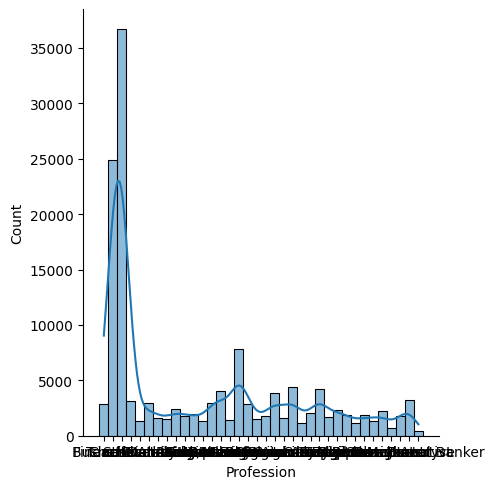

In [147]:
sns.displot(train['Profession'], kde=True)

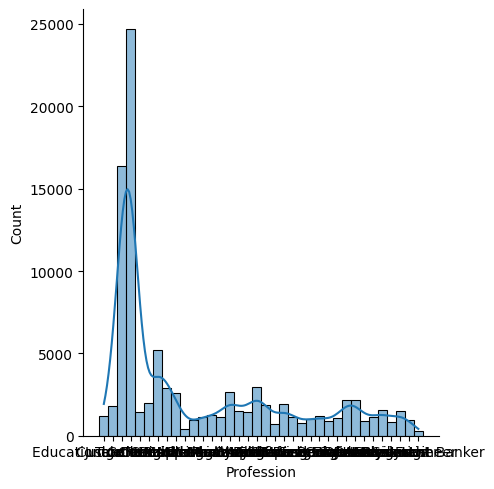

In [148]:
sns.displot(test['Profession'], kde=True)

In [149]:
train['Depression'].value_counts()

,count
Depression,
0,115133
1,25567


In [150]:
print(nullpercent(train))
print('*************************')
print(nullpercent(test))

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
Numeric Sleep Duration         

In [151]:
train['Academic Pressure'].value_counts(dropna=False)

,count
Academic Pressure,
NaN,112803
3.0,7463
5.0,6296
4.0,5158
1.0,4801
2.0,4179


In [152]:
train[train['Academic Pressure'].isna()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,Healthy,MCA,No,7.0,5.0,No,0,5.5


In [153]:
train['Academic Pressure']=train['Academic Pressure'].fillna(0)
test['Academic Pressure']=test['Academic Pressure'].fillna(0)

In [154]:
print(nullpercent(train))
print('*************************')
print(nullpercent(test))

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                         0.000000
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
Numeric Sleep Duration         

In [155]:
train['Work Pressure'].value_counts(dropna=False)

,count
Work Pressure,
NaN,27918
2.0,24373
4.0,22512
5.0,22436
3.0,21899
1.0,21562


In [156]:
train[train['Work Pressure'].isna()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,other,5.0,NaN,8.97,2.0,NaN,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
8,8,Aishwarya,Female,24.0,Bangalore,Student,other,2.0,NaN,5.90,5.0,NaN,Moderate,BSc,No,3.0,2.0,Yes,0,5.5
26,26,Aditya,Male,31.0,Srinagar,Student,other,3.0,NaN,7.03,5.0,NaN,Healthy,BA,No,9.0,1.0,Yes,0,5.0
30,30,Prisha,Female,28.0,Varanasi,Student,other,3.0,NaN,5.59,2.0,NaN,Moderate,BCA,Yes,4.0,5.0,Yes,1,7.5
32,32,Chhavi,Female,25.0,Jaipur,Student,other,4.0,NaN,8.13,3.0,NaN,Moderate,M.Tech,Yes,1.0,1.0,No,0,5.5


In [157]:
train['Work Pressure']=train['Work Pressure'].fillna(0)
test['Work Pressure']=test['Work Pressure'].fillna(0)

In [158]:
train['Study Satisfaction'].value_counts(dropna=False)

,count
Study Satisfaction,
NaN,112803
4.0,6360
2.0,5840
3.0,5823
1.0,5451
5.0,4423


In [159]:
train['Study Satisfaction']=train['Study Satisfaction'].fillna(0)
test['Study Satisfaction']=test['Study Satisfaction'].fillna(0)

In [160]:
train['Job Satisfaction']=train['Job Satisfaction'].fillna(0)
test['Job Satisfaction']=test['Job Satisfaction'].fillna(0)

In [161]:
train['Dietary Habits'].value_counts(dropna=False)

,count
Dietary Habits,
Moderate,49705
Unhealthy,46227
Healthy,44741
NaN,4
More Healthy,2
No,2
Yes,2
Pratham,1
3,1


In [162]:
values_list = [
    'NaN', 'Yes', 'No', 'More Healthy', 'Class 12', 'Indoor', 'Male', 'Vegas', 'M.Tech',
    'Less Healthy', 'No Healthy', 'Hormonal', 'Electrician', '1.0', 'Mihir', 'Less than Healthy',
    '3', 'Gender', 'BSc', 'Pratham', '2', 'Educational', 'Naina', 'Raghav', 'Vivaan',
    '5 Unhealthy', 'Soham', '5 Healthy', 'Academic', 'MCA', 'Resistant', 'Mealy', 'Prachi',
    'Kolkata'
]

In [163]:
# Replace using apply with lambda
train["Dietary Habits"] = train["Dietary Habits"].apply(
    lambda x: 'other' if x in values_list or pd.isna(x) else x
)

In [164]:
# Replace using apply with lambda
test["Dietary Habits"] = test["Dietary Habits"].apply(
    lambda x: 'other' if x in values_list or pd.isna(x) else x
)

In [165]:
test['Dietary Habits'].value_counts(dropna=False)

,count
Dietary Habits,
Moderate,33018
Unhealthy,30786
Healthy,29966
other,30


In [166]:
train['Degree'].value_counts(dropna=False)

,count
Degree,
Class 12,14729
B.Ed,11691
B.Arch,8742
B.Com,8113
B.Pharm,5856
...,...
LCA,1
B B.Com,1
RCA,1


In [167]:
data_Degree = [
    np.nan, "M.Arch", "UX/UI Designer", "B.Sc", "Kalyan", "M", "LLBA", "NaN", "BArch", "L.Ed", "BPharm",
    "P.Com", "Nalini", "BEd", "B", "Degree", "Jhanvi", "Bhopal", "MEd", "LL B.Ed", "LLTech", "M_Tech",
    "5.88", "Pihu", "HCA", "Marsh", "Lata", "S.Arch", "BB", "LHM", "8.56", "Entrepreneur", "Aarav",
    "B.Student", "E.Tech", "M.S", "Navya", "Mihir", "RCA", "B B.Com", "LCA", "N.Pharm", "Doctor",
    "CGPA", "LLEd", "LLS", "Esha", "Working Professional", "Mthanya", "B.3.79", "K.Ed", "Mahika",
    "24", "M. Business Analyst", "Brithika", "ACA", "Badhya", "HR Manager", "Unite", "P.Pharm",
    "MPharm", "Data Scientist", "LL.Com", "Business Analyst", "H_Pharm", "Class 11", "20", "S.Tech",
    "Veda", "BH", "MPA", "S.Pharm", "Vrinda", "Bhavesh", "Brit", "B.B.Arch", "7.06", "B BA",
    "5.56", "Ritik", "B.03", "5.61", "0", "Plumber", "BPA", "Vivaan", "MTech", "29", "LLCom", "Advait",
    "BTech", "3.0", "B.M.Com", "Eshita", "M.UI", "B.H", "Mechanical Engineer", "I.Ed", "Magan", "B B.Tech",
    "M.B.Ed", "B Financial Analyst", "GCA", "G.Ed", "Rupak", "B.CA", "PCA", "J.Ed", "8.95", "Aadhya",
    "Banchal", "M.", "B.BA", "Moham", "B. Gender", "A.Ed", "Vibha", "B BCA", "B.Press", "Gagan",
    "Travel Consultant", "5.65", "B_Com", "E.Ed", "B._Pharm", "Pune", "Bian", "B.Study_Hours",
    "Kavya", "M.M.Ed", "BHCA"
]

In [168]:
# Replace using apply with lambda
train["Degree"] = train["Degree"].apply(
    lambda x: 'other' if x in data_Degree or pd.isna(x) else x
)

In [169]:
# Replace using apply with lambda
test["Degree"] = test["Degree"].apply(
    lambda x: 'other' if x in data_Degree or pd.isna(x) else x
)

In [170]:
test['Degree'].value_counts(dropna=False)

,count
Degree,
Class 12,9812
B.Ed,7762
B.Arch,6037
B.Com,5439
B.Pharm,3987
BCA,3869
M.Ed,3707
MCA,3438
BBA,3387


In [171]:
train['Financial Stress'].value_counts(dropna=False)

,count
Financial Stress,
2.0,31451
5.0,28279
4.0,27765
1.0,27211
3.0,25990
NaN,4


In [172]:
train = train.dropna(subset=['Financial Stress'])
test = test.dropna(subset=['Financial Stress'])

In [173]:
print(nullpercent(train))
print('*************************')
print(nullpercent(test))

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                         0.000000
Work Pressure                             0.000000
CGPA                                     80.173566
Study Satisfaction                        0.000000
Job Satisfaction                          0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
Numeric Sleep Duration         

In [174]:
train.drop(columns='CGPA', inplace=True)
test.drop(columns='CGPA', inplace=True)

In [175]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,2.0,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,3.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,other,5.0,0.0,2.0,0.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.0,1.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5


In [176]:
train['City'].value_counts(dropna=False)

,count
City,
Kalyan,6591
Patna,5924
Vasai-Virar,5765
Kolkata,5688
Ahmedabad,5613
...,...
Pooja,1
Khushi,1
Khaziabad,1


In [177]:
test['City'].value_counts(dropna=False)

,count
City,
Kalyan,4387
Vasai-Virar,3897
Patna,3888
Kolkata,3726
Ahmedabad,3677
...,...
Vidhi,1
Abhinav,1
Rolkata,1


In [178]:
names = [
    "Mihir", "Nandini", "Mahi", "Vidya", "City", "Pratyush",
    "Harsha", "Saanvi", "Vidya", "Siddhesh", "Bhavna", "Vikram",
    "Keshav", "Nalini", "City", "Hrithik", "San Vasai-Virar",
    "Vaikot", "Leela", "Chemist", "Ghopal", "No", "More Delhi",
    "Saanvi", "Pratham", "Vidhi", "Abhinav", "Rolkata", "Parth",
    "Aditi", "Saurav", "Sara", "Less Delhi", "Golkata", "Is Kanpur",
    "Unaly", "Thani", "Lawyer", "Vaishnavi", "Ira", "Avni",
    "Mhopal", "Less than 5 hours", "Pratyush", "Malyan", "No.12",
    "Bhavna", "Molkata", "MCA", "M.Com", "Atharv", "Nalini",
    "Keshav", "Ayush", "M.Tech", "Researcher", "Vaishnavi",
    "Chhavi", "Parth", "Vidhi", "Tushar", "MSc", "No",
    "Rashi", "ME", "Ishanabad", "Armaan", "Kagan", "Kashish",
    "Ithal", "Nalyan", "Dhruv", "Galesabad", "Itheg", "Aaradhya",
    "Pooja", "Khushi", "Khaziabad", "Jhanvi", "Kibara", "Harsh",
    "Reyansh", "Morena", "Less Delhi", "Malyansh", "Aditya", "Plata",
    "Aishwarya", "3.0", "Less than 5 Kalyan", "Krishna", "Mira",
    "Moreadhyay", "Ishkarsh", "Raghavendra", "Kashk", "Gurgaon",
    "Tolkata", "Anvi", "Krinda", "Ayansh", "Shrey", "Ivaan",
    "Vaanya", "Gaurav", "Unirar"
]

In [179]:
# Replace using apply with lambda
train["City"] = train["City"].apply(
    lambda x: 'other' if x in names or pd.isna(x) else x
)

In [180]:
# Replace using apply with lambda
test["City"] = test["City"].apply(
    lambda x: 'other' if x in names or pd.isna(x) else x
)

In [181]:
train.drop(columns=['id', 'Name'], inplace=True)
test.drop(columns=['id', 'Name'], inplace=True)

In [182]:
train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,2.0,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,3.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
2,Male,33.0,Visakhapatnam,Student,other,5.0,0.0,2.0,0.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.0,1.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5


In [183]:
# Convert Gender column: Male -> 1, Female -> 0
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 0})

# Convert 'Have you ever had suicidal thoughts?' column: Yes -> 1, No -> 0
train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

# Convert 'Family History of Mental Illness' column: Yes -> 1, No -> 0
train['Family History of Mental Illness'] = train['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

# Convert Gender column: Male -> 1, Female -> 0
test['Gender'] = test['Gender'].replace({'Male': 1, 'Female': 0})

# Convert 'Have you ever had suicidal thoughts?' column: Yes -> 1, No -> 0
test['Have you ever had suicidal thoughts ?'] = test['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

# Convert 'Family History of Mental Illness' column: Yes -> 1, No -> 0
test['Family History of Mental Illness'] = test['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

<ipython-input-183-2c0bda74d400>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-183-2c0bda74d400>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
<ipython-input-183-2c0bda74d400>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

In [184]:
test.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Numeric Sleep Duration
0,1,53.0,Visakhapatnam,Working Professional,Judge,0.0,2.0,0.0,5.0,Moderate,LLB,0,9.0,3.0,1,5.0
1,0,58.0,Kolkata,Working Professional,Educational Consultant,0.0,2.0,0.0,4.0,Moderate,B.Ed,0,6.0,4.0,0,5.0
2,1,53.0,Jaipur,Working Professional,Teacher,0.0,4.0,0.0,1.0,Moderate,B.Arch,1,12.0,4.0,0,7.5
3,0,23.0,Rajkot,Student,other,5.0,0.0,1.0,0.0,Moderate,BSc,1,10.0,4.0,0,8.0
4,1,47.0,Kalyan,Working Professional,Teacher,0.0,5.0,0.0,5.0,Moderate,BCA,1,3.0,4.0,0,7.5


In [185]:
train.columns.to_frame()

,0
Gender,Gender
Age,Age
City,City
Working Professional or Student,Working Professional or Student
Profession,Profession
Academic Pressure,Academic Pressure
Work Pressure,Work Pressure
Study Satisfaction,Study Satisfaction
Job Satisfaction,Job Satisfaction
Dietary Habits,Dietary Habits


In [186]:

#Define the column names
numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                     'Work/Study Hours', 'Financial Stress', 'Numeric Sleep Duration']
categorical_columns = ['City', 'Working Professional or Student', 'Profession', 'Dietary Habits', 'Degree']

## Data Preparation

Di mana data mentah yang sudah dieksplorasi (EDA) diubah menjadi format siap pakai untuk model

1. Data Selection


In [202]:
# Step 1: Data Selection
# List of all relevant columns (without including target 'Depression')
relevant_columns = ['Gender', 'Age', 'City', 'Working Professional or Student',
                    'Profession', 'Academic Pressure', 'Work Pressure',
                    'Study Satisfaction', 'Job Satisfaction', 'Numeric ySleep Duration',
                    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
                    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']

# Selecting relevant columns from both train and test data
train_selected = train[relevant_columns + ['Depression']]  # Including 'Depression' in training data
test_selected = test[relevant_columns]  # Only selecting features (no 'Depression')

# Verify that the train and test data have the same columns
print("Train columns:", train_selected.columns)
print("Test columns:", test_selected.columns)

train_selected.head(), test_selected.head()

Train columns: Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction', 'Numeric Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')
Test columns: Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction', 'Numeric Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')


(   Gender   Age           City Working Professional or Student  \
 0       0  49.0       Ludhiana            Working Professional   
 1       1  26.0       Varanasi            Working Professional   
 2       1  33.0  Visakhapatnam                         Student   
 3       1  22.0         Mumbai            Working Professional   
 4       0  30.0         Kanpur            Working Professional   
 
          Profession  Academic Pressure  Work Pressure  Study Satisfaction  \
 0              Chef                0.0            5.0                 0.0   
 1           Teacher                0.0            4.0                 0.0   
 2             other                5.0            0.0                 2.0   
 3           Teacher                0.0            5.0                 0.0   
 4  Business Analyst                0.0            1.0                 0.0   
 
    Job Satisfaction  Numeric Sleep Duration Dietary Habits   Degree  \
 0               2.0                     8.0        He

2. Data Cleaning


Proses pembersihan dilakukan untuk mengatasi nilai yang hilang dalam dataset. Kami menggunakan SimpleImputer dari sklearn untuk mengimputasi nilai yang hilang pada kolom numerik dengan mean dan pada kolom kategorikal dengan mode (nilai yang paling sering muncul).

In [187]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [188]:
# Preprocessing pipelines
# For numerical columns, apply StandardScaler (and impute if necessary)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values if any
    ('scaler', StandardScaler())
])

# For categorical columns, apply OneHotEncoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values if any
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

numerical_pipeline: Ini adalah pipeline untuk menangani kolom numerik. Pertama, nilai yang hilang akan diimputasi dengan mean menggunakan SimpleImputer(strategy='mean'). Kemudian, StandardScaler digunakan untuk menstandardisasi data numerik.

categorical_pipeline: Ini adalah pipeline untuk menangani kolom kategorikal. Nilai yang hilang diimputasi dengan most_frequent (nilai yang paling sering muncul) menggunakan SimpleImputer(strategy='most_frequent'). Kemudian, OneHotEncoder digunakan untuk mengubah data kategorikal menjadi format numerik dengan representasi one-hot encoding. Argumen handle_unknown='ignore' memastikan bahwa jika ada nilai yang tidak terlihat selama pelatihan, itu tidak menyebabkan error, dan drop='first' menghindari kolinearitas dengan menghapus satu kategori.

In [189]:
# Combine the numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

ColumnTransformer digunakan untuk menggabungkan pipeline untuk kolom numerik dan kategorikal. Setiap jenis kolom (numerik dan kategorikal) akan diproses menggunakan pipeline yang berbeda.

transformers:

Bagian pertama ('num', numerical_pipeline, numerical_columns) menangani kolom numerik.

Bagian kedua ('cat', categorical_pipeline, categorical_columns) menangani kolom kategorikal.

numerical_columns dan categorical_columns adalah daftar kolom yang relevan dalam dataset untuk masing-masing jenis data. (Daftar ini harus didefinisikan sebelumnya).



In [190]:
# Apply the transformations
X = preprocessor.fit_transform(train.drop('Depression', axis=1))
y = train['Depression']
test_dataframe = preprocessor.transform(test)

fit_transform pada data pelatihan (train) digunakan untuk mempelajari parameter transformasi dari data pelatihan (seperti mean dan standar deviasi untuk scaling, atau modus untuk imputasi) dan langsung mengaplikasikan transformasi tersebut.

train.drop('Depression', axis=1) digunakan untuk memisahkan kolom target Depression dari fitur yang digunakan untuk pelatihan model. Kolom Depression hanya digunakan untuk melatih model, tidak termasuk dalam fitur.

transform pada data pengujian (test) digunakan untuk mengaplikasikan transformasi yang sudah dipelajari pada data pelatihan ke data pengujian (tanpa mengubah parameter transformasi).

## Model
Building Model

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [193]:

# 1. Siapkan X dan y (misal train_df sudah ter-preprocess via pipeline)
# Jika kamu menggunakan `pipe = Pipeline([('preproc', preprocessor), ('clf', ...)])`,
# cukup panggil pipe.fit/predict langsung di pipeline.
X = train.drop(columns=['Name', 'Depression'])
y = train['Depression']

KeyError: "['Name'] not found in axis"

In [ ]:
# 2. Split data (stratify supaya distribusi kelas terjaga)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Evaluasi Model

In [ ]:
# 3. Bangun & fit model
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

In [ ]:
# 4. Evaluasi pada validation set
y_pred       = log_clf.predict(X_val)
y_pred_proba = log_clf.predict_proba(X_val)[:, 1]

print("=== Evaluation on Validation Set ===")
print("Accuracy       :", accuracy_score(y_val, y_pred))
print("Confusion Matr.:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC        :", roc_auc_score(y_val, y_pred_proba))

In [ ]:
#Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_pred_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend()
plt.show()

In [ ]:
# 5. Predict pada test set
#    (asumsikan features test sudah disiapkan di `test_dataframe`)
predictions = log_clf.predict(test_dataframe)

In [ ]:
# 6. Buat file submission
submission = pd.DataFrame({
    "id"        : test["id"],
    "Depression": predictions.astype(int)
})
submission.to_csv('submission_.csv', index=False)
print("Submission saved to submission_.csv")